<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [3]:
X.shape

(442, 10)

# **Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# **Model training**

In [5]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

[Text(0.5535322816368639, 0.96875, 'x[8] <= -0.004\nsquared_error = 5923.056\nsamples = 353\nvalue = 152.221'),
 Text(0.3211453318431912, 0.90625, 'x[2] <= 0.006\nsquared_error = 3417.144\nsamples = 172\nvalue = 111.041'),
 Text(0.21194764442916095, 0.84375, 'x[6] <= 0.021\nsquared_error = 2441.406\nsamples = 134\nvalue = 98.41'),
 Text(0.14943689821182943, 0.78125, 'x[4] <= 0.063\nsquared_error = 3137.471\nsamples = 74\nvalue = 111.959'),
 Text(0.11739167812929849, 0.71875, 'x[9] <= -0.032\nsquared_error = 2741.87\nsamples = 72\nvalue = 108.361'),
 Text(0.06155433287482806, 0.65625, 'x[0] <= -0.035\nsquared_error = 2196.243\nsamples = 31\nvalue = 90.581'),
 Text(0.0343878954607978, 0.59375, 'x[1] <= 0.003\nsquared_error = 2463.592\nsamples = 17\nvalue = 113.765'),
 Text(0.02063273727647868, 0.53125, 'x[0] <= -0.071\nsquared_error = 1035.109\nsamples = 8\nvalue = 156.125'),
 Text(0.013755158184319119, 0.46875, 'x[3] <= -0.018\nsquared_error = 388.0\nsamples = 5\nvalue = 137.0'),
 Text(

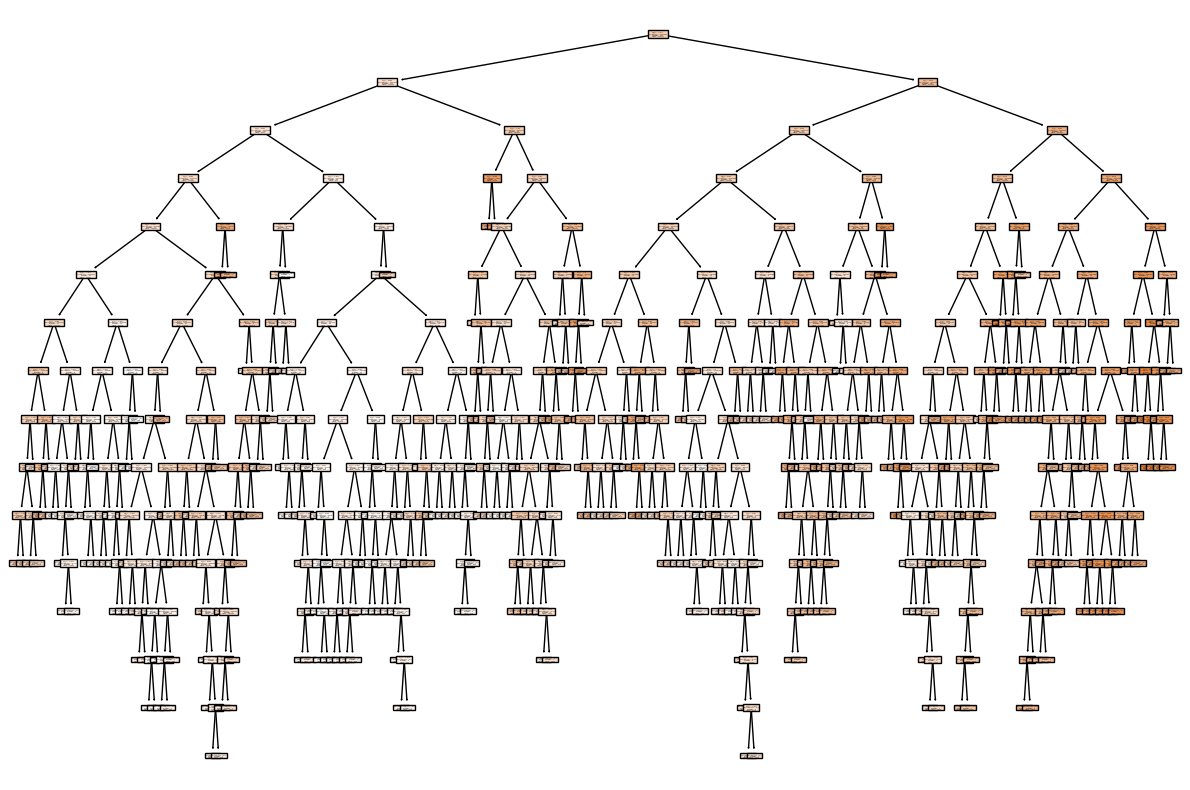

In [6]:
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(dtr, filled=True)

In [7]:
y_pred= dtr.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mean_squared_error : ',mean_squared_error(y_pred, y_test))
print('mean_absolute_error : ',mean_absolute_error(y_pred, y_test))
print('r2_score : ', r2_score(y_pred, y_test))

mean_squared_error :  5886.123595505618
mean_absolute_error :  55.89887640449438
r2_score :  -0.027980349129790527


# **Very Bad accuracy.**

# **Hyperparameter tunning using gridSearchCV**

In [9]:
params ={
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2,3,4,5,6,7]
}

In [10]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params, scoring = 'r2', n_jobs = -1, refit = True, cv = 5)
gsv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='r2')

[Text(0.5, 0.8333333333333334, 'x[8] <= -0.004\npoisson = 19.675\nsamples = 353\nvalue = 152.221'),
 Text(0.25, 0.5, 'x[2] <= 0.006\npoisson = 14.281\nsamples = 172\nvalue = 111.041'),
 Text(0.125, 0.16666666666666666, 'poisson = 11.464\nsamples = 134\nvalue = 98.41'),
 Text(0.375, 0.16666666666666666, 'poisson = 13.65\nsamples = 38\nvalue = 155.579'),
 Text(0.75, 0.5, 'x[2] <= 0.013\npoisson = 14.306\nsamples = 181\nvalue = 191.354'),
 Text(0.625, 0.16666666666666666, 'poisson = 12.953\nsamples = 94\nvalue = 160.947'),
 Text(0.875, 0.16666666666666666, 'poisson = 10.335\nsamples = 87\nvalue = 224.207')]

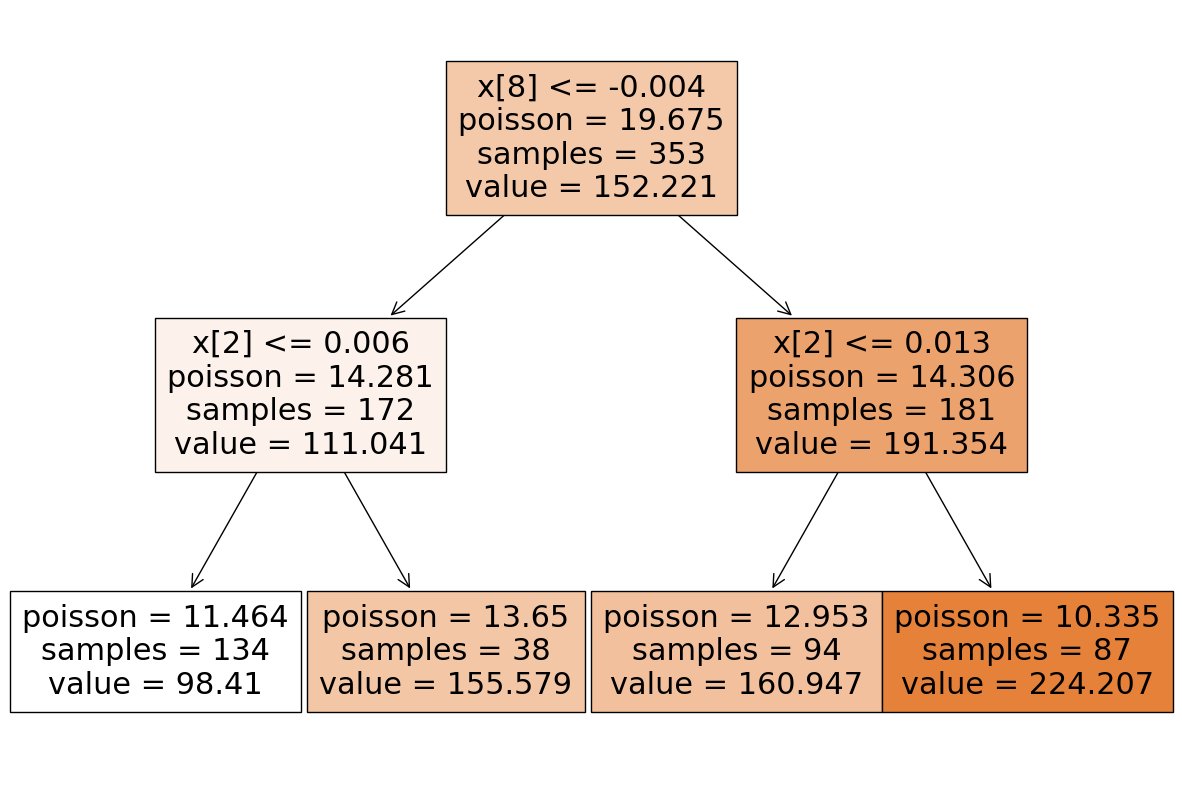

In [13]:
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(gsv.best_estimator_, filled=True)

In [16]:
gsv.best_params_

{'criterion': 'poisson', 'max_depth': 2, 'splitter': 'best'}

In [17]:
gsv.best_score_

0.2918310037298145

In [20]:
y_pred = gsv.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mean_squared_error : ',mean_squared_error(y_pred, y_test))
print('mean_absolute_error : ',mean_absolute_error(y_pred, y_test))
print('r2_score : ', r2_score(y_pred, y_test))

mean_squared_error :  2760.049488294774
mean_absolute_error :  40.981308967306866
r2_score :  -0.031437471680314966
